#### **Fig05_Sensitivity_analysis.ipynb**

Sensitivity analysis under varying weightings and prediction horizons (3h, 6h, 12h, 24h) for a one-week simulation. Top: Economic profit (EUR); Bottom: Transformer load (%). Subfigures: (a) linear MPC, (b) nonlinear MPC, (c) nonlinear MPC with transformer load constraint.

In [37]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
import simbench as sb
import seaborn as sns
import matplotlib.patches as mpatches
from matplotlib import cm

In [38]:
# Define the start and end timestep
timestep_start = 7584
timestep_end = timestep_start + 672  # Dynamic calculation of the end timestep
timesteps = f"{timestep_start}-{timestep_end}"

print("Fig05_Sensitivity_analysis.ipynb") 

# Define the storage path for the results
parent_dir = os.path.abspath(os.path.join(os.getcwd(), "..", "results"))
storage_dir = os.path.join(parent_dir, "costs_no_storage")
file_path = os.path.join(storage_dir, f"{timesteps}_money_spend_sum_no_storage.npy")

# Load the file and correct the sign (energy costs are negative)
money_spend_sum_no_storage = float(np.load(file_path))

# Print the loaded value for verification
print(f"Loaded energy costs without storage and heat pump control: {money_spend_sum_no_storage} €")

# Print the loaded value for verification
print(f"The following code loads the energy costs for the simulation period {timesteps}, ")
print(f"which were calculated in the file 'Fig05_Reference_Run_{timesteps}.ipynb'.")
print(f"Loaded energy costs without storage and heat pump control: {money_spend_sum_no_storage:.2f} €")

timestep_start = '7584'
timesteps = f'{timestep_start}-{int(timestep_start)+672}'

Fig05_Sensitivity_analysis.ipynb
Loaded energy costs without storage and heat pump control: 88.34 €
The following code loads the energy costs for the simulation period 7584-8256, 
which were calculated in the file 'Fig05_Reference_Run_7584-8256.ipynb'.
Loaded energy costs without storage and heat pump control: 88.34 €


### Comparison of three MPC variants

Three different MPC approaches can be evaluated separately. To do this, the desired variant must be activated, and the others must be commented out:

1. **Pywraplp-MPC** (`base_folder_year = "pywraplp"`) – MILP with `pywraplp`, without transformer constraint.
2. **Pyomo-MPC without transformer** (`base_folder_year = "pyomo_2024_no_trafo"`) – Pyomo without transformer constraint.
3. **Pyomo-MPC with transformer** (`base_folder_year = "pyomo_2024_trafo"`) – Pyomo with transformer constraint.

Only one variant should be active at a time; the others must be commented out.

In [39]:
# 1 pywraplp 
#base_folder_year = "pywraplp"
#pgf_file="MILP"
#MPCvariant = "pywraplp"
#base_year = "final_2024"

# 2 pyomo bo trafo
base_folder_year = "pyomo_2024_no_trafo"
pgf_file="notrafo"
MPCvariant = "pyomo"
base_year = "final_2024"

# 3 pyomo trafo
#base_folder_year = "pyomo_2024_trafo"
#pgf_file="trafo"
#MPCvariant = "pyomo"
#base_year = "final_2024"

In [40]:
pad_inches=0.5
# Matplotlib & Seaborn settings
sns.set_style("whitegrid", {'axes.grid': True, 'axes.edgecolor': 'black'})
plt.rcParams.update({
    "pgf.texsystem": "pdflatex",
    "text.usetex": True,
    "font.family": "serif",
    "pgf.rcfonts": False,
    "font.size": 18,
})
sns.color_palette("tab10")

# Define parameters (make sure these variables are defined or set them as you need)
omega1_values = np.arange(0.0, 1.1, 0.1)
forecast_horizons = ["3h", "6h", "12h", "24h"]
net = sb.get_simbench_net("1-LV-rural1--1-sw")

# If not defined already, define these or import them from wherever they are defined
# base_folder_year = ...
# base_year = ...
# timesteps = ...
# money_spend_sum_no_storage = ...

# -------------------------------------------------------------------
# PART A: Economic Profit and Transformer Loading
# -------------------------------------------------------------------

# Initialize lists for Economic Profit
omega1_list_profit, horizon_list_profit, value_list_profit = [], [], []

# Initialize lists for Transformer Loading
omega1_list_load, horizon_list_load = [], []
mean_transformer_list, percentile_95_trafo_list, percentile_99_trafo_list = [], [], []

print("Current working directory:", os.getcwd())

# Load and process data for Economic Profit and Transformer Loading
for omega1 in omega1_values:
    omega2 = 1 - omega1
    for horizon in forecast_horizons:
        file_name = f"../results/{base_folder_year}/O1_{omega1:.1f}andO2_{omega2:.1f}/{base_year}_model_predictive_{timesteps}_0.0percentnoise_{horizon}.pkl"
        print(f"Checking file: {file_name}")
        if os.path.exists(file_name):
            with open(file_name, 'rb') as file:
                data = pickle.load(file)
            
            # Economic Profit Calculation
            value = -( 1 * (np.sum(data["out_money_spend"]) / 100) + money_spend_sum_no_storage)
            omega1_list_profit.append(omega1)
            horizon_list_profit.append(int(horizon[:-1]))
            value_list_profit.append(value)
            
            # Transformer Loading Calculation
            values = data["out_res_trafo_loading_percent"]
            mean_transformer = np.mean(values)
            percentile_95_trafo = np.percentile(values, 95)
            percentile_99_trafo = np.percentile(values, 99)
            
            omega1_list_load.append(omega1)
            horizon_list_load.append(int(horizon[:-1]))
            mean_transformer_list.append(mean_transformer)
            percentile_95_trafo_list.append(percentile_95_trafo)
            percentile_99_trafo_list.append(percentile_99_trafo)
        else:
            print(f"File {file_name} does not exist")

Current working directory: /hkfs/home/haicore/iai/ii6824/Documents/eGridLVOpt/plot-paper
Checking file: ../results/pyomo_2024_no_trafo/O1_0.0andO2_1.0/final_2024_model_predictive_7584-8256_0.0percentnoise_3h.pkl
Checking file: ../results/pyomo_2024_no_trafo/O1_0.0andO2_1.0/final_2024_model_predictive_7584-8256_0.0percentnoise_6h.pkl
Checking file: ../results/pyomo_2024_no_trafo/O1_0.0andO2_1.0/final_2024_model_predictive_7584-8256_0.0percentnoise_12h.pkl
Checking file: ../results/pyomo_2024_no_trafo/O1_0.0andO2_1.0/final_2024_model_predictive_7584-8256_0.0percentnoise_24h.pkl
Checking file: ../results/pyomo_2024_no_trafo/O1_0.1andO2_0.9/final_2024_model_predictive_7584-8256_0.0percentnoise_3h.pkl
Checking file: ../results/pyomo_2024_no_trafo/O1_0.1andO2_0.9/final_2024_model_predictive_7584-8256_0.0percentnoise_6h.pkl
Checking file: ../results/pyomo_2024_no_trafo/O1_0.1andO2_0.9/final_2024_model_predictive_7584-8256_0.0percentnoise_12h.pkl
Checking file: ../results/pyomo_2024_no_trafo/O

###### --- Economic Profit 3D Plot ---

Economic Profit - Min: 71.2 Max: 124.5 Mid: 97.8
Saving plot to fig05a3dProfitpyomo202412notrafo.pgf


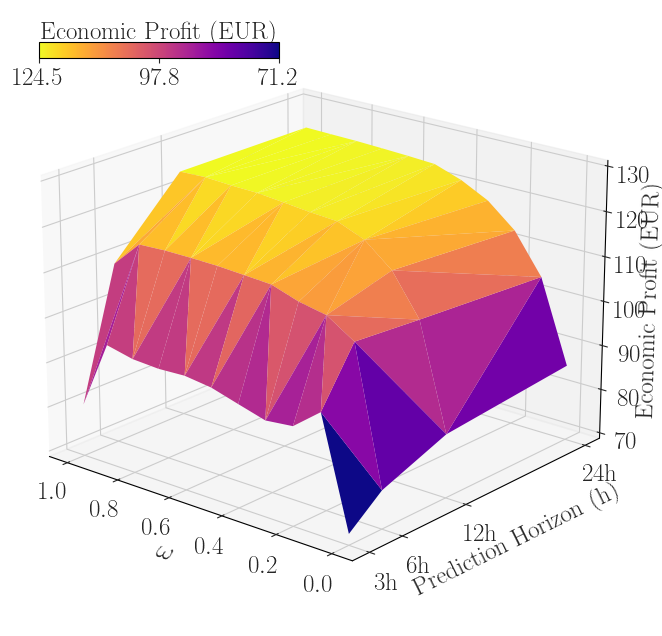

In [41]:
# --- Economic Profit 3D Plot ---
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
cmap = cm.plasma
norm = plt.Normalize(min(value_list_profit), max(value_list_profit))

ax.plot_trisurf(omega1_list_profit, horizon_list_profit, value_list_profit, cmap=cmap, edgecolor='none')
ax.set_xlabel(r'$\omega$', fontsize=19, labelpad=5)
ax.set_ylabel('Prediction Horizon (h)', labelpad=5)
ax.set_zlabel('Economic Profit (EUR)', labelpad=-2)
ax.set_yticks(sorted(set(horizon_list_profit)))
ax.set_yticklabels([f"{h}h" for h in sorted(set(horizon_list_profit))])
ax.invert_xaxis()
ax.view_init(elev=20, azim=-50)
ax.dist = 12
#ax.set_zlim(-10, 45)
#ax.set_zticks([230, 255 ,280])
ax.set_zticks([70, 80, 90, 100, 110, 120, 130])

# Print Min, Max, and Mid values as Integers
min_profit = round(float(min(value_list_profit)), 1)
max_profit = round(float(max(value_list_profit)), 1)
mid_profit = round(float((min_profit + max_profit) / 2), 1)
print("Economic Profit - Min:", min_profit, "Max:", max_profit, "Mid:", mid_profit)

# Colorbar
cbar_ax = fig.add_axes([0.28, 0.820, 0.2, 0.02])
cbar = plt.colorbar(cm.ScalarMappable(cmap=cmap, norm=norm), cax=cbar_ax, orientation='horizontal')
cbar.set_label('Economic Profit (EUR)', labelpad=-50)
cbar.ax.set_xticks([min_profit, mid_profit, max_profit])
cbar.ax.invert_xaxis()  # Invert the horizontal axis of the colorbar

output_pgf = f"fig05a3dProfit{MPCvariant}2024{ax.dist}{pgf_file}.pgf"

print(f"Saving plot to {output_pgf}")
plt.savefig(output_pgf, bbox_inches='tight', pad_inches=pad_inches)
plt.show()

###### --- Transformer Loading 3D Plot ---

Transformer Load - Min: 22.9 Max: 35.0 Mid: 28.9
Saving plot to fig05b3dTrafopyomo202412notrafo.pgf


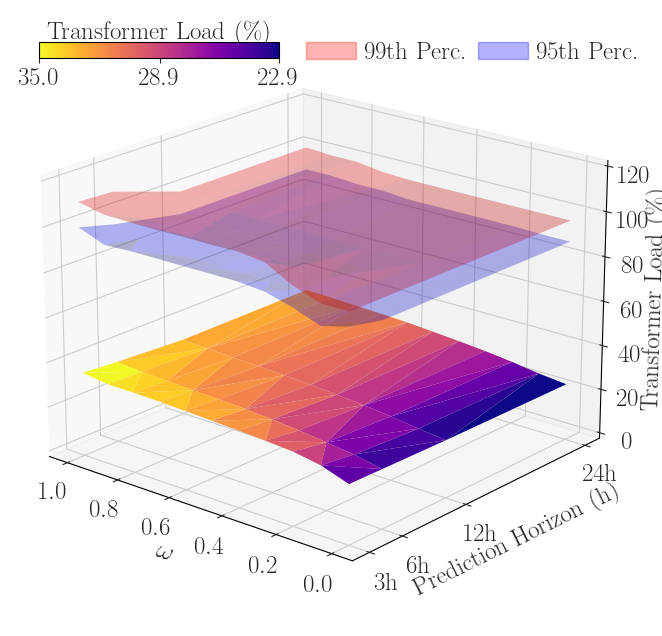

In [42]:
# --- Transformer Loading 3D Plot ---
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
norm = plt.Normalize(min(mean_transformer_list), max(mean_transformer_list))
ax.plot_trisurf(omega1_list_load, horizon_list_load, mean_transformer_list, cmap=cmap, edgecolor='none')

# Percentile surfaces
ax.plot_trisurf(omega1_list_load, horizon_list_load, percentile_99_trafo_list, color='red', alpha=0.3, edgecolor='none')
ax.plot_trisurf(omega1_list_load, horizon_list_load, percentile_95_trafo_list, color='blue', alpha=0.3, edgecolor='none')
ax.set_xlabel(r'$\omega$', fontsize=19, labelpad=5)
ax.set_ylabel('Prediction Horizon (h)', labelpad=5)
ax.set_zlabel(r'Transformer Load (\%)', labelpad=-0)
ax.set_yticks(sorted(set(horizon_list_load)))
ax.set_yticklabels([f"{h}h" for h in sorted(set(horizon_list_load))])
ax.invert_xaxis()
ax.view_init(elev=20, azim=-50)
ax.dist = 12
ax.set_zlim(0, 120)
ax.set_zticks(np.linspace(0, 120, num=7))
# Legend for Percentile Surfaces
legend_elements = [mpatches.Patch(color='red', alpha=0.3, label="99th Perc."), mpatches.Patch(color='blue', alpha=0.3, label="95th Perc.")]
ax.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.75, 0.985), ncol=2, frameon=False,
    handletextpad=0.3, # Weniger Abstand zwischen Symbol und Text
    columnspacing=0.5 # Kürzerer Abstand zwischen den Legendenelementen
)
# Print Min, Max, and Mid values as Integers
min_load = round(float(min(mean_transformer_list)), 1)
max_load = round(float(max(mean_transformer_list)), 1)
mid_load = round(float((min_load + max_load) / 2), 1)
print("Transformer Load - Min:", min_load, "Max:", max_load, "Mid:", mid_load)

# Colorbar
cbar_ax = fig.add_axes([0.28, 0.820, 0.2, 0.02])
cbar = plt.colorbar(cm.ScalarMappable(cmap=cmap, norm=norm), cax=cbar_ax, orientation='horizontal')
cbar.set_label(r'Transformer Load (\%)', labelpad=-50)
cbar.ax.set_xticks([min_load, mid_load, max_load])
cbar.ax.invert_xaxis()  # Invert the horizontal axis of the colorbar

output_pgf = f"fig05b3dTrafo{MPCvariant}2024{ax.dist}{pgf_file}.pgf"

print(f"Saving plot to {output_pgf}")
plt.savefig(output_pgf, bbox_inches='tight', pad_inches=pad_inches)
plt.show()

In [43]:
print("finish")

finish
